In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report

In [2]:
data = pd.read_csv('emails.csv')
data=data.drop('Email No.', axis=1)
data.head(10)

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
5,4,5,1,4,2,3,45,1,0,16,...,0,0,0,0,0,0,0,0,0,1
6,5,3,1,3,2,1,37,0,0,9,...,0,0,0,0,0,0,0,0,0,0
7,0,2,2,3,1,2,21,6,0,2,...,0,0,0,0,0,0,0,1,0,1
8,2,2,3,0,0,1,18,0,0,3,...,0,0,0,0,0,0,0,0,0,0
9,4,4,35,0,1,0,49,1,16,9,...,0,0,0,0,0,0,0,0,0,0


In [3]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

## KNN CLASS from scratch

In [4]:
def euclidean_distance(X1,X2):
    distances=np.sqrt(np.sum((X1-X2)**2))
    return  distances

In [5]:
class KNN():
    def __init__(self,k):
        self.k=k

    def fit(self,X,Y):
        self.X_train=X
        self.Y_train=Y

    def predict(self,X): # this function makes prediction for all the test data points
     predictions=[self.pred(x) for x in X]
     return predictions
    
    def pred(self,x): #helper function for making prediction for a single testing data
        distances=[euclidean_distance(x_train,x) for x_train in self.X_train]
        #get the closest K
        k_indices=np.argsort(distances)[:self.k] #first sorting the distances in ascending order then taking the first k values from the k_indices vector
        k_nearest_labels=[self.Y_train[i] for i in k_indices] #gives the values of target labels corresponding to those k_indices, e.g-red,red,blue,for k=3
        #majority vote
        majority_vote=Counter(k_nearest_labels).most_common() #e.g red for previous line example
        return majority_vote[0][0]

## k-fold cross validation

In [6]:
indices=list(range(len(Y)))
k_folds=5

In [7]:
folds=np.array_split(indices,k_folds)
K=[1,3,5,7,10]

In [8]:
Average_Accuracy=[]

for i in K:
    clf=KNN(k=i)
    Accuracy=0
    for f_idx in range (k_folds):
        test_folds=folds[f_idx]
        train_folds=np.concatenate(np.delete(folds,f_idx,axis=0))
        X_train,X_test,Y_train,Y_test=X[train_folds],X[test_folds],Y[train_folds],Y[test_folds]
        ##fitting the model
    
    
        clf.fit(X_train,Y_train) # calling the fit function from KNN class
        predictions=clf.predict(X_test) # calling the predict function from KNN class
        Accuracy=Accuracy+np.sum(predictions==Y_test)/len(Y_test)
    
    Average_Accuracy.append(Accuracy/5)

In [9]:
Average_Accuracy

[0.8344000000000001, 0.841, 0.8418000000000001, 0.8452, 0.85]

In [10]:
Average_Accuracy

[0.8344000000000001, 0.841, 0.8418000000000001, 0.8452, 0.85]

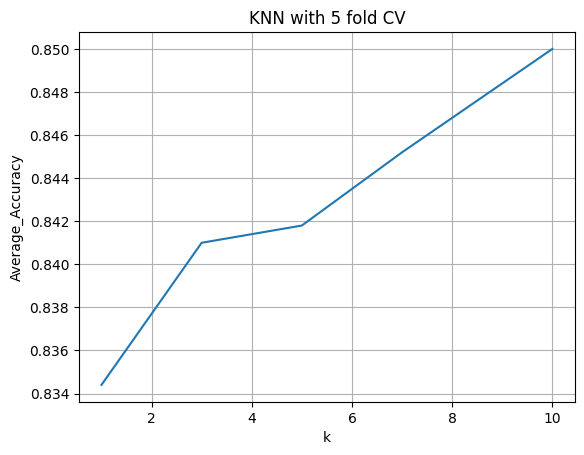

In [16]:
plt.figure()
plt.plot(K, Average_Accuracy)
plt.ylabel('Average_Accuracy')
plt.xlabel('k')
plt.title('KNN with 5 fold CV')
plt.grid()
plt.savefig("sec2_Q4_acc_vs_k_plot.eps")